In [3]:
!pip install seaborn
!pip install scikit-learn
!pip install optuna

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np



Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [4]:
df=pd.read_csv('scitweets_export.tsv', sep='\t')
display (df.head())

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,316669998137483264,Knees are a bit sore. i guess that's a sign th...,0,0.0,0.0,0.0
1,1,319090866545385472,McDonald's breakfast stop then the gym 🏀💪,0,0.0,0.0,0.0
2,2,322030931022065664,Can any Gynecologist with Cancer Experience ex...,1,1.0,0.0,0.0
3,3,322694830620807168,Couch-lock highs lead to sleeping in the couch...,1,1.0,0.0,0.0
4,4,328524426658328576,Does daily routine help prevent problems with ...,1,1.0,0.0,0.0


In [5]:
# Vérifier la présence de valeurs manquantes et les supprimer si nécessaire
df.dropna(subset=['text'], inplace=True)

# Sélectionner les colonnes nécessaires
X_text = df['text']  # Les tweets
y = df['science_related']  # Les labels (scientifique ou non)

# Création de la matrice TF-IDF
vectorizer = TfidfVectorizer()  # Initialisation du vectorizer
X_tfidf = vectorizer.fit_transform(X_text)  # Transformation des tweets en vecteurs TF-IDF

# Afficher la forme de la matrice résultante
print("Taille de la matrice TF-IDF :", X_tfidf.shape)
#----------------------------------------------------------------------
# Conversion de la matrice TF-IDF en DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Afficher un extrait de la matrice TF-IDF
print("Aperçu de la matrice TF-IDF (5 premières lignes) :")
display(tfidf_df.head())  # Utilisation de display() pour bien formater l'affichage dans Jupyter

Taille de la matrice TF-IDF : (1140, 7969)
Aperçu de la matrice TF-IDF (5 premières lignes) :


,000,01,049,07904567432a,093,0cmzimdaje,0hitnsx0c4,0iwaxgdpww,0jlkmseyhp,0oup8eayxh,...,ᴸᴼᵛᴱ,ᴼᴺ,ᴼᴼᴴ,ᵀᴴᴵˢ,ᵞᴼᵁ,ᶜᴴᴬᴿᴬᶜᵀᴱᴿ,逃げ恥,音樂,더쇼,런쥔을_공평하게_대하세요
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:


# (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['science_related'], test_size=0.2, random_state=42, stratify=df['science_related'])
#print(X_test)


🔍 Naive Bayes
✅ Accuracy: 0.6930
📄 Classification Report:
              precision    recall  f1-score   support

           0     0.6861    1.0000    0.8138       153
           1     1.0000    0.0667    0.1250        75

    accuracy                         0.6930       228
   macro avg     0.8430    0.5333    0.4694       228
weighted avg     0.7894    0.6930    0.5872       228



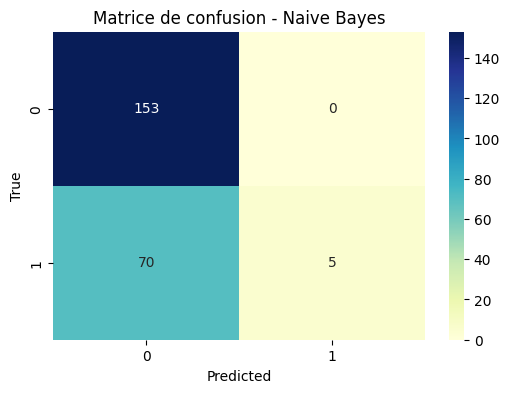


🔍 Decision Tree
✅ Accuracy: 0.7544
📄 Classification Report:
              precision    recall  f1-score   support

           0     0.7771    0.8889    0.8293       153
           1     0.6792    0.4800    0.5625        75

    accuracy                         0.7544       228
   macro avg     0.7282    0.6844    0.6959       228
weighted avg     0.7449    0.7544    0.7415       228



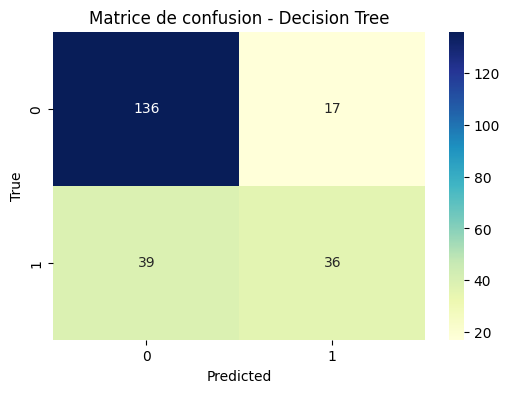


🔍 SVM
✅ Accuracy: 0.8026
📄 Classification Report:
              precision    recall  f1-score   support

           0     0.7872    0.9673    0.8680       153
           1     0.8750    0.4667    0.6087        75

    accuracy                         0.8026       228
   macro avg     0.8311    0.7170    0.7384       228
weighted avg     0.8161    0.8026    0.7827       228



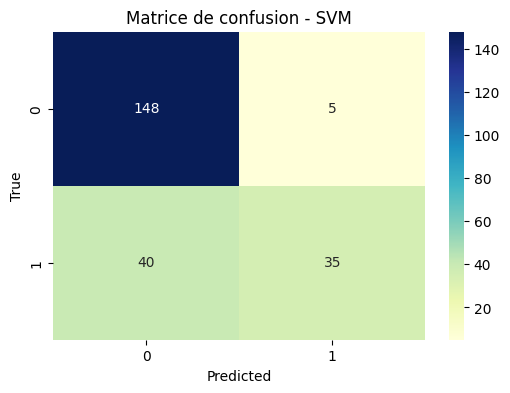


🔍 K-NN
✅ Accuracy: 0.7456
📄 Classification Report:
              precision    recall  f1-score   support

           0     0.7811    0.8627    0.8199       153
           1     0.6441    0.5067    0.5672        75

    accuracy                         0.7456       228
   macro avg     0.7126    0.6847    0.6935       228
weighted avg     0.7360    0.7456    0.7367       228



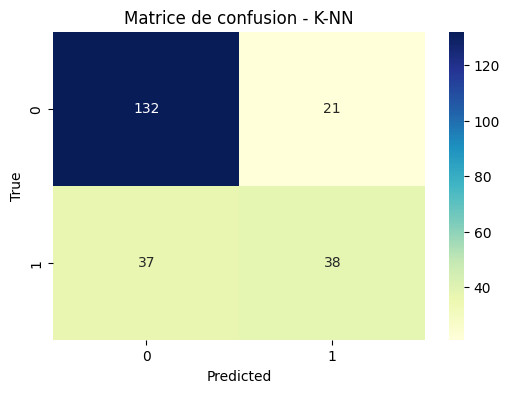


🔍 Random Forest
✅ Accuracy: 0.7456
📄 Classification Report:
              precision    recall  f1-score   support

           0     0.7273    0.9935    0.8398       153
           1     0.9474    0.2400    0.3830        75

    accuracy                         0.7456       228
   macro avg     0.8373    0.6167    0.6114       228
weighted avg     0.7997    0.7456    0.6895       228



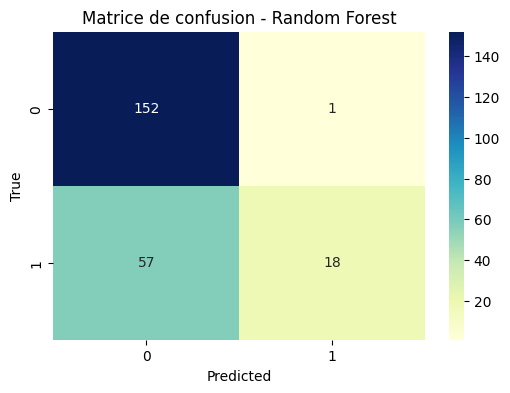


🔍 XGBoost
✅ Accuracy: 0.8158
📄 Classification Report:
              precision    recall  f1-score   support

           0     0.8323    0.9085    0.8688       153
           1     0.7705    0.6267    0.6912        75

    accuracy                         0.8158       228
   macro avg     0.8014    0.7676    0.7800       228
weighted avg     0.8120    0.8158    0.8103       228



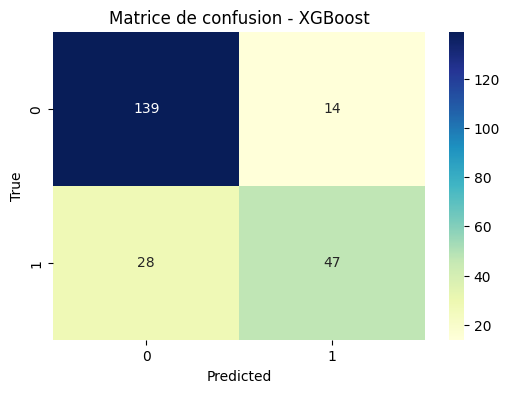


🔍 Neural Network - MLP
✅ Accuracy: 0.7895
📄 Classification Report:
              precision    recall  f1-score   support

           0     0.7933    0.9281    0.8554       153
           1     0.7755    0.5067    0.6129        75

    accuracy                         0.7895       228
   macro avg     0.7844    0.7174    0.7342       228
weighted avg     0.7874    0.7895    0.7756       228



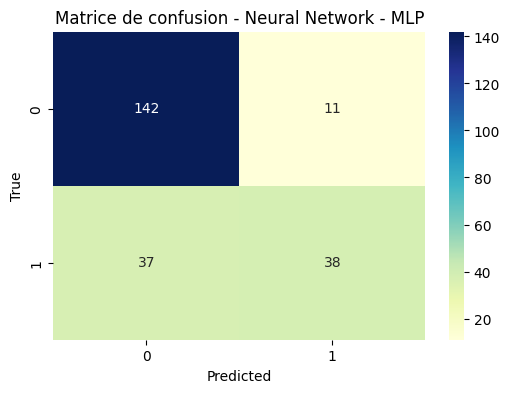

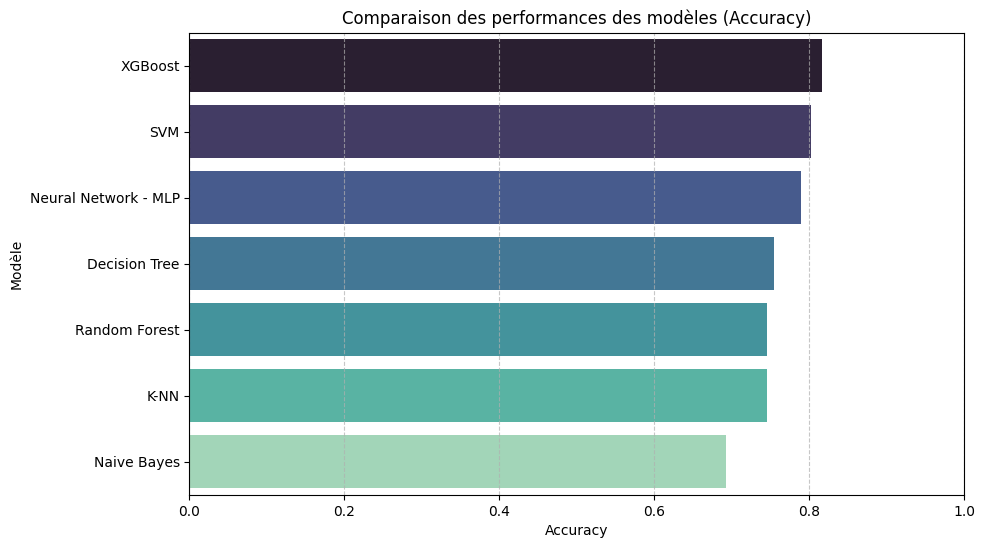

In [7]:
# Modèles de base
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier




def plot_confusion_matrix(y_test, y_pred, labels, title):
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap="YlGnBu")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Matrice de confusion - {title}")
    plt.show()
    
models = {
    "Naive Bayes": MultinomialNB(),
    #"Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": LinearSVC(),
    "K-NN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "Neural Network - MLP": MLPClassifier()
}

results = []

# ⚙️ Entraînement, prédiction, évaluation
for name, model in models.items():
    print(f"\n🔍 {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))

    print(f"✅ Accuracy: {acc:.4f}")
    print("📄 Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))
    
    plot_confusion_matrix(y_test, y_pred, labels=np.unique(y), title=name)

# 📊 Comparaison des modèles avec diagramme en barres
results_df = pd.DataFrame(results, columns=["Modèle", "Accuracy"])
results_df = results_df.sort_values("Accuracy", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Accuracy", y="Modèle", palette="mako")
plt.title("Comparaison des performances des modèles (Accuracy)")
plt.xlabel("Accuracy")
plt.ylabel("Modèle")
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [8]:
#correction fonction pipline
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, cross_validate
import time

class Result:
    def __init__(self, name, scoremean, stdresult, timespent, params=None, precision=None, recall=None, f1=None):
        self.name = name
        self.scoremean = scoremean
        self.stdresult = stdresult
        self.timespent = timespent
        self.params = params
        self.precision = precision
        self.recall = recall
        self.f1 = f1



def MyTestPipelines(models, X, y, score='accuracy', save_csv=True, filename='model_results.csv'):
    seed = 7
    allresults = []
    results = []
    names = []
    
    # Define the scoring metrics to calculate
    scoring = {'accuracy': 'accuracy', 
               'precision': 'precision_weighted',
               'recall': 'recall_weighted', 
               'f1': 'f1_weighted'}
    
    for name, model in models:
        print(f"Evaluation de {name}")
        
        # Cross validation
        kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
        start_time = time.time()
        
        # Use cross_validate to get multiple metrics
        cv_results = cross_validate(model, X, y, cv=kfold, scoring=scoring)
        
        thetime = time.time() - start_time
        
        # Create result object with all metrics
        result = Result(
            name=name,
            scoremean=cv_results['test_accuracy'].mean(),
            stdresult=cv_results['test_accuracy'].std(),
            timespent=thetime,
            params=str(model.get_params()),
            precision=cv_results['test_precision'].mean(),
            recall=cv_results['test_recall'].mean(),
            f1=cv_results['test_f1'].mean()
        )
        
        allresults.append(result)
        results.append(cv_results['test_accuracy'])
        names.append(name)
        
        print(f"{name} : {cv_results['test_accuracy'].mean():.3f} ({cv_results['test_accuracy'].std():.3f}) in {thetime:.3f} s")
    
    # Sort by the main score (accuracy by default)
    allresults = sorted(allresults, key=lambda result: result.scoremean, reverse=True)
    
    # Display the best result
    print('\nLe meilleur resultat : ')
    print(f'Classifier : {allresults[0].name} {score} : {allresults[0].scoremean:.3f} ({allresults[0].stdresult:.3f}) en {allresults[0].timespent:.3f} s\n')
    
    # Display all results
    print('Tous les résultats : \n')
    for result in allresults:
        print(f'Classifier : {result.name} {score} : {result.scoremean:.3f} ({result.stdresult:.3f}) en {result.timespent:.3f} s')
    
    # Save results to CSV if requested
    if save_csv:
        save_results_to_csv(allresults, filename)
    
    return allresults

def save_results_to_csv(allresults, filename='model_results.csv'):
    """Save the results to a CSV file."""
    data = {
        'Model Name': [result.name for result in allresults],
        'Parameters': [result.params for result in allresults],
        'Accuracy': [result.scoremean for result in allresults],
        'Std Dev': [result.stdresult for result in allresults],
        'Precision': [result.precision for result in allresults],
        'Recall': [result.recall for result in allresults],
        'F1 Score': [result.f1 for result in allresults],
        'Execution Time (s)': [result.timespent for result in allresults]
    }
    
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)
    print(f'\nResults saved to {filename}')


In [9]:
#from pipelineCsvCaching import MyTestPipelines
from sklearn.pipeline import Pipeline

models_pipeline = [
    ("Naive Bayes", Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
        ('clf', MultinomialNB())
    ])),
    ("Decision Tree", Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
        ('clf', DecisionTreeClassifier())
    ])),
    ("SVM", Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
        ('clf', LinearSVC())
    ])),
    ("K-NN", Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
        ('clf', KNeighborsClassifier())
    ])),
    ("Random Forest", Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
        ('clf', RandomForestClassifier())
    ])),
    ("XGBoost", Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
        ('clf', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
    ])),
    ("Neural Network - MLP", Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
        ('clf', MLPClassifier(max_iter=300))
    ]))
]

results = MyTestPipelines(models_pipeline, X=df["text"], y=df["science_related"])


Evaluation de Naive Bayes
Naive Bayes : 0.766 (0.042) in 0.229 s
Evaluation de Decision Tree
Decision Tree : 0.726 (0.028) in 0.660 s
Evaluation de SVM
SVM : 0.808 (0.028) in 0.230 s
Evaluation de K-NN
K-NN : 0.748 (0.037) in 0.236 s
Evaluation de Random Forest
Random Forest : 0.774 (0.037) in 3.659 s
Evaluation de XGBoost


/home/nina/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [11:39:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nina/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [11:39:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nina/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [11:39:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nina/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [11:39:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nina/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [11:39:21] WARNING: /workspace/src/learner.

XGBoost : 0.772 (0.030) in 1.926 s
Evaluation de Neural Network - MLP
Neural Network - MLP : 0.792 (0.031) in 34.375 s

Le meilleur resultat : 
Classifier : SVM accuracy : 0.808 (0.028) en 0.230 s

Tous les résultats : 

Classifier : SVM accuracy : 0.808 (0.028) en 0.230 s
Classifier : Neural Network - MLP accuracy : 0.792 (0.031) en 34.375 s
Classifier : Random Forest accuracy : 0.774 (0.037) en 3.659 s
Classifier : XGBoost accuracy : 0.772 (0.030) en 1.926 s
Classifier : Naive Bayes accuracy : 0.766 (0.042) en 0.229 s
Classifier : K-NN accuracy : 0.748 (0.037) en 0.236 s
Classifier : Decision Tree accuracy : 0.726 (0.028) en 0.660 s

Results saved to model_results.csv


In [10]:
#partie optuna

In [13]:
import optuna
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier

def objective_xgb(trial):
    # Espace de recherche pour TfidfVectorizer
    max_features = trial.suggest_int("max_features", 1000, 10000, step=1000)
    ngram_range = trial.suggest_categorical("ngram_range", [(1,1), (1,2)])
    
    # Espace de recherche pour XGBoost
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.5, log=True)
    n_estimators = trial.suggest_int("n_estimators", 100, 1000)
    max_depth = trial.suggest_int("max_depth", 3, 10)
    subsample = trial.suggest_float("subsample", 0.5, 1.0)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1.0)

    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', max_features=max_features, ngram_range=ngram_range)),
        ('clf', XGBClassifier(
            use_label_encoder=False,
            eval_metric='mlogloss',
            learning_rate=learning_rate,
            max_depth=max_depth,
            n_estimators=n_estimators,
            subsample=subsample,
            colsample_bytree=colsample_bytree,
            random_state=42,
            n_jobs=-1
        ))
    ])

    # Validation croisée
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, df['text'], df['science_related'], scoring='f1_weighted', cv=cv, n_jobs=-1)
    return scores.mean()
#-----------lancer optuna---------------------

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=50)

print("Meilleurs hyperparamètres pour XGBoost :")
print(study_xgb.best_params)
#----------------------

best_xgb = study_xgb.best_params

optimized_pipeline_xgb = Pipeline([
    ('tfidf', TfidfVectorizer(
        stop_words='english',
        max_features=best_xgb['max_features'],
        ngram_range=best_xgb['ngram_range']
    )),
    ('clf', XGBClassifier(
        use_label_encoder=False,
        eval_metric='mlogloss',
        learning_rate=best_xgb['learning_rate'],
        max_depth=best_xgb['max_depth'],
        n_estimators=best_xgb['n_estimators'],
        subsample=best_xgb['subsample'],
        colsample_bytree=best_xgb['colsample_bytree'],
        random_state=42,
        n_jobs=-1
    ))
])

# Tester avec ta fonction personnalisée
MyTestPipelines(
    models=[("XGBoost Optuna", optimized_pipeline_xgb)],
    X=df['text'],
    y=df['science_related'],
    filename="optuna_xgboost_pipeline.csv"
)


[I 2025-04-14 11:56:45,138] A new study created in memory with name: no-name-ba2db4df-9ee4-4fc6-b513-3f98bc2c4681
/home/nina/.local/lib/python3.10/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (1, 1) which is of type tuple.
  warnings.warn(message)
/home/nina/.local/lib/python3.10/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (1, 2) which is of type tuple.
  warnings.warn(message)
/home/nina/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [11:56:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nina/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [11:56:45] WARNING: /workspace/src/learner

Meilleurs hyperparamètres pour XGBoost :
{'max_features': 5000, 'ngram_range': (1, 2), 'learning_rate': 0.021832736059521435, 'n_estimators': 489, 'max_depth': 7, 'subsample': 0.9523023082184514, 'colsample_bytree': 0.9654846275734897}
Evaluation de XGBoost Optuna


/home/nina/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [11:58:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nina/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [11:58:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nina/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [11:58:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nina/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [11:58:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/nina/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [11:58:39] WARNING: /workspace/src/learner.

XGBoost Optuna : 0.781 (0.036) in 9.626 s

Le meilleur resultat : 
Classifier : XGBoost Optuna accuracy : 0.781 (0.036) en 9.626 s

Tous les résultats : 

Classifier : XGBoost Optuna accuracy : 0.781 (0.036) en 9.626 s

Results saved to optuna_xgboost_pipeline.csv
